In [53]:
!pip install git+git://github.com/lesc-ufv/cad4u.git &> /dev/null
%cd /content
!git clone https://github.com/dalilavieira/CNN.git &> /dev/null

/content


In [54]:
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences


def dataset(again):
    #img = cv2.imread('a.png')
    use = []
    test_labels, train_labels, test_images, train_images = [], [], [], []

    flag = 0    
    for _,_,files in os.walk('/content/CNN/-0.28_2/and'):
        #print(files)
        for f in files:
        	if f.find('png') != -1 and f.find('and') != -1 and v_and:
        		#print(f)
        		s = '/content/CNN/-0.28_2/and/'+f
        		use.append(s)
        		if flag % 4 == 0:
        			test_labels.append(1)
        		else:
        			train_labels.append(1)
        		flag += 1

    flag = 0    		
    for _,_,files in os.walk('/content/CNN/-0.28_2/or'):
        #print(files)
        for f in files:
        	if f.find('png') != -1 and f.find('or') != -1 and v_or:
        		s = '/content/CNN/-0.28_2/or/'+f
        		use.append(s)
        		if flag % 4 == 0:
        			test_labels.append(2)
        		else:
        			train_labels.append(2)
        		flag += 1

    flag = 0   		
    for _,_,files in os.walk('/content/CNN/-0.28_2/xor'):
        #print(files)
        for f in files:
        	if f.find('png') != -1 and f.find('xor') != -1 and v_xor:
        		s = '/content/CNN/-0.28_2/xor/'+f
        		use.append(s)
        		if flag % 4 == 0:
        			test_labels.append(3)
        		else:
        			train_labels.append(3)
        		flag += 1


    flag = 0   		
    for _,_,files in os.walk('/content/CNN/-0.28_2/xnor'):
        #print(files)
        for f in files:
        	if f.find('png') != -1 and f.find('xnor') != -1 and v_xnor:
        		s = '/content/CNN/-0.28_2/xnor/'+f
        		use.append(s)
        		v = 4		
        		if again:
        			v = 3        		
        		if flag % 4 == 0:
        			test_labels.append(v)
        		else:
        			train_labels.append(v)
        		flag += 1

    flag = 0   		
    for _,_,files in os.walk('/content/CNN/-0.28_2/nor'):
        #print(files)
        for f in files:
        	if f.find('png') != -1 and f.find('nor') != -1 and v_nor:
        		s = '/content/CNN/-0.28_2/nor/'+f
        		use.append(s)			
        		v = 5		
        		if again:
        			v = 1
        		if flag % 4 == 0:
        			test_labels.append(v)
        		else:
        			train_labels.append(v)
        		flag += 1

    flag = 0   		
    for _,_,files in os.walk('/content/CNN/-0.28_2/nand'):
        #print(files)
        for f in files:
        	if f.find('png') != -1 and f.find('nand') != -1 and v_nand:
        		s = '/content/CNN/-0.28_2/nand/'+f
        		use.append(s)
        		v = 6		
        		if again:
        			v = 2
        		if flag % 4 == 0:
        			test_labels.append(6)
        		else:
        			train_labels.append(6)
        		flag += 1

    
   
    flag = 0  
    for u in use:
    	img2 = np.zeros([400, 400, 3],dtype=np.uint8)
    	img = cv2.imread(u)
    	print('val of u',u)
    	#print(np.shape(img))	
    	for i in range(400):
    		for j in range(400):
    			img2[(i, j, 0)] = img[(i, j, 0)] 
    			img2[(i, j, 1)] = img[(i, j, 1)] 
    			img2[(i, j, 2)] = img[(i, j, 2)] 

    	img2 = cv2.resize(img2, (80, 80))
    	if flag % 4 == 0:
    		test_images.append(img2)
    	else:
    		train_images.append(img2)
			
    	flag += 1

    	#break
    	#print(img)
    #print(test_images)   
 
    train_images =  np.array(train_images)  
    test_images =  np.array(test_images) 

    train_labels =  np.array(train_labels)  
    test_labels =  np.array(test_labels)  

    print(len(train_labels), len(test_labels))
    
    return train_images, train_labels, test_images, test_labels
    
#dataset()
print('a')

a


In [55]:
#train_images, train_labels, test_images, test_labels = dataset(False)

In [56]:
import matplotlib.pyplot as plt

def desenha():
  plt.figure(figsize=(20,20))
  for i in range(0,30,2):
      plt.subplot(5,5,int(i/2)+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(test_images[i])
      # The CIFAR labels happen to be arrays, 
      # which is why you need the extra index
      plt.xlabel(test_labels[i])
  plt.show()

#desenha()

In [57]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


def x(again):
    
  train_images, train_labels, test_images, test_labels = dataset(again)


  print(type(train_images[0]))

  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu')) #64
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu'))

  model.summary()

  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(10))

  model.summary()

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  history = model.fit(train_images, train_labels, epochs=100, 
                      validation_data=(test_images, test_labels))
  
  return history.history['val_accuracy']




In [63]:
v_and = True
v_or = False
v_xor = False
v_xnor = False
v_nand = False
v_nor = True

lin_1 = x(False)

v_and = False
v_or = False
v_xor = True
v_xnor = True
v_nand = False
v_nor = False

lin_2 = x(False)

v_and = False
v_or = True
v_xor = False
v_xnor = False
v_nand = True
v_nor = False

lin_3 = x(False)

v_and = True
v_or = True
v_xor = True
v_xnor = True
v_nand = True
v_nor = True

lin_4 = x(True)

val of u /content/CNN/-0.28_2/and/and18.png
val of u /content/CNN/-0.28_2/and/and6.png
val of u /content/CNN/-0.28_2/and/and3.png
val of u /content/CNN/-0.28_2/and/and9.png
val of u /content/CNN/-0.28_2/and/and1.png
val of u /content/CNN/-0.28_2/and/and14.png
val of u /content/CNN/-0.28_2/and/and15.png
val of u /content/CNN/-0.28_2/and/and13.png
val of u /content/CNN/-0.28_2/and/and8.png
val of u /content/CNN/-0.28_2/and/and16.png
val of u /content/CNN/-0.28_2/and/and11.png
val of u /content/CNN/-0.28_2/and/and4.png
val of u /content/CNN/-0.28_2/and/and7.png
val of u /content/CNN/-0.28_2/and/and10.png
val of u /content/CNN/-0.28_2/and/and2.png
val of u /content/CNN/-0.28_2/and/and5.png
val of u /content/CNN/-0.28_2/and/and12.png
val of u /content/CNN/-0.28_2/and/and17.png
val of u /content/CNN/-0.28_2/and/and20.png
val of u /content/CNN/-0.28_2/and/and19.png
val of u /content/CNN/-0.28_2/nor/nor2.png
val of u /content/CNN/-0.28_2/nor/nor5.png
val of u /content/CNN/-0.28_2/nor/nor13.png

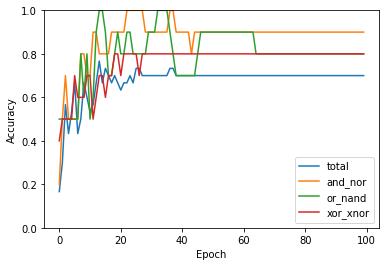

In [64]:
#plt.plot(history.history['accuracy'], label='accuracy')

plt.plot(lin_4, label = 'total')
plt.plot(lin_1, label = 'and_nor')
plt.plot(lin_3, label = 'or_nand')
plt.plot(lin_2, label = 'xor_xnor')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')


In [60]:

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
#print(test_acc)